In [2]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
pd.set_option('display.max_columns', None)
color = ['#247BA0', '#F6511D', '#7FB800', '#FFB400', '#F25F5C', '#50514F']

# ABSTRACT

In this data project, we work on the Brazilian E-Commerce Public Dataset by Olist (https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce). We explore the data to see the performance of Olist, make customer segmentation to analyze customer behavior and use anomaly detection to check if there is any unusual event in the platform. The purpose of this project is to find out potential business value from customer behavior analysis.

# Introduction

Olist is an E-Commerce company which is established in 2015, it offers digital sales solution to sellers by connecting them to the digital market. With technology and market insights, Olist can help sellers to establish digital brand image and increase sales channel.

For an E-Commerce company, it is crucial to understand the needs of customers. With exploratory data analysis and machine learning clustering model, we try to understand customer behaviors and find out potential business value in the data.

By studying the Olist data, we can get insights of the E-Commerce field. The ideas and models can be possibly to apply to other companies in the E-Commerce field, but not only Olist itself.

In [3]:
olist_customers_dataset = pd.read_csv('olist_customers_dataset.csv')
olist_geolocation_dataset = pd.read_csv('olist_geolocation_dataset.csv')
olist_order_items_dataset = pd.read_csv('olist_order_items_dataset.csv')
olist_order_payments_dataset = pd.read_csv('olist_order_payments_dataset.csv')
olist_order_reviews_dataset = pd.read_csv('olist_order_reviews_dataset.csv')
olist_orders_dataset = pd.read_csv('olist_orders_dataset.csv')
olist_products_dataset = pd.read_csv('olist_products_dataset.csv')
olist_sellers_dataset = pd.read_csv('olist_sellers_dataset.csv')
product_category_name_translation = pd.read_csv('product_category_name_translation.csv')

# Data Preprocessing

We are going to use the Brazilian E-Commerce Public Dataset by Olist on Kaggle in this project, and since we are going to study the customer behavior, so we select the customers, order items, order payment, order review, products dataset to start our work.

In [4]:
olist_customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
olist_orders_dataset['purchase_date'] = pd.to_datetime(olist_orders_dataset['order_purchase_timestamp']).dt.date

In [6]:
order_count = olist_orders_dataset.groupby('purchase_date')[['order_id']].count().reset_index()

After looking at the time series dataset, we discovered that the date range of the data is from 2016 to 2018, but some data is missing in 2016 and 2018, so we are going to focus only the 2017 data to observe the whole year performance.

# Sales Performance

There are 45,101 orders in 2017, and we can see that there is a huge increase in sales in November, but sales finally decreased in December.

To find out the reason behind the huge increase in November, we look at the daily sales. We can find that it is because of Black Friday, that day recorded 1,176 orders, which is almost ten times of average daily number of orders which is 125.

Overall, sales are going up and Black Friday is an important catalyst for sales performance.

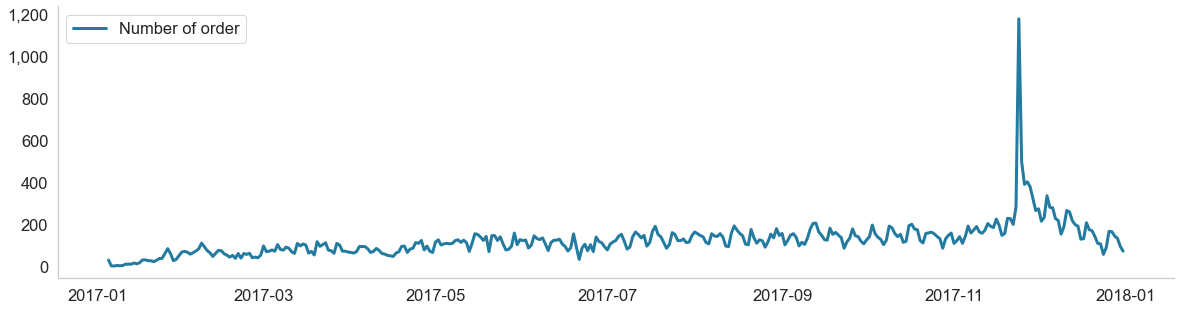

In [17]:
sns.set(style = 'whitegrid', font_scale = 1.5)
sns.set_palette(color)
fig, axes = plt.subplots(figsize=(20,5))
plt.plot(order_count['purchase_date'], order_count['order_id'], 
         label = 'Number of order', linewidth = 3)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
axes.grid()
plt.legend()

In [8]:
order_count = order_count[(order_count['purchase_date'] >= datetime.date(2017,1,1)) & (order_count['purchase_date'] < datetime.date(2018,1,1))]

In [9]:
order_count.sum()

order_id    45101
dtype: int64

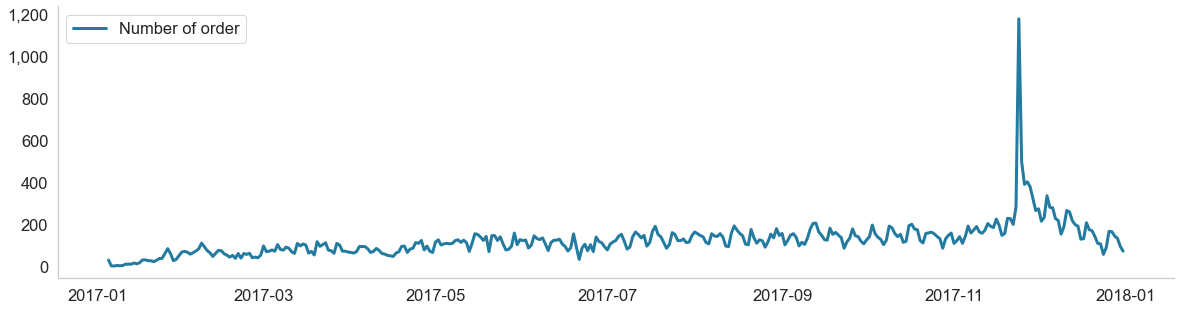

In [16]:
sns.set(style = 'whitegrid', font_scale = 1.5)
sns.set_palette(color)
fig, axes = plt.subplots(figsize=(20,5))
plt.plot(order_count['purchase_date'], order_count['order_id'], 
         label = 'Number of order', linewidth = 3)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
axes.grid()
plt.legend()

In [11]:
order_count['order_id'].mean()

124.93351800554017

In [12]:
order_count[order_count['order_id'] == 1176]

,purchase_date,order_id
338,2017-11-24,1176


In [13]:
olist_orders_dataset['purchase_month'] = olist_orders_dataset['order_purchase_timestamp'].astype(str).str.slice(0, 7)
order_count_month = olist_orders_dataset.groupby('purchase_month')[['order_id']].count().reset_index()
order_count_month['purchase_month'] = order_count_month['purchase_month'].astype('datetime64[ns]')
order_count_month = order_count_month[(order_count_month['purchase_month'] >= '2017-01-01') & (order_count_month['purchase_month'] < '2018-01-01')]

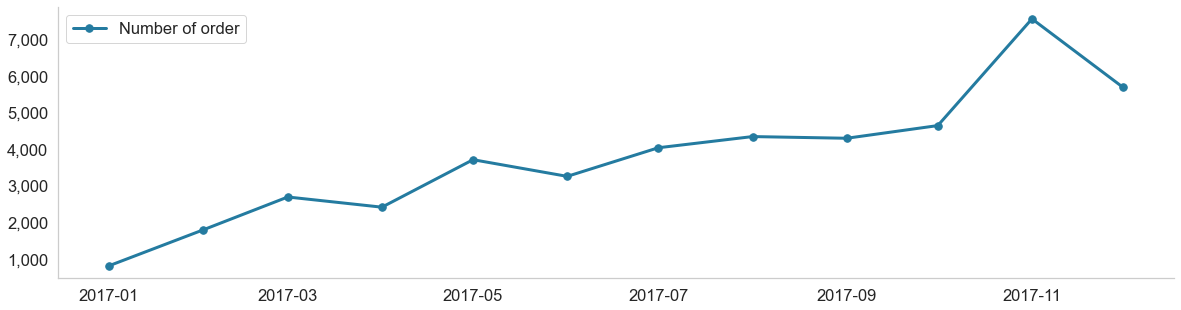

In [15]:
sns.set(style = 'whitegrid', font_scale = 1.5)
sns.set_palette(color)
fig, axes = plt.subplots(figsize=(20,5))
plt.plot(order_count_month['purchase_month'], order_count_month['order_id'], 
         label = 'Number of order', marker = '.', markersize = 15, linewidth = 3)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
axes.grid()
plt.legend()

In [18]:
order_count_month['order_id'].mean()

3758.4166666666665

In [19]:
order_count_month['order_id'].max()

7544

# Order Payment

The mean of the order value is about R$100, which means that most of the orders may be involve daily lives products, but not luxury goods.

Around 72% of the orders are paid by credit card, and around 20% of the orders are paid by Boleto, which is a payment method in Brazil regulated by Brazilian Federation of Banks.

In [20]:
price_stat = pd.merge(olist_orders_dataset, olist_order_payments_dataset)

In [21]:
price_stat = price_stat[(price_stat['purchase_date'] >= datetime.date(2017,1,1)) & (price_stat['purchase_date'] < datetime.date(2018,1,1))]

In [22]:
price_stat = price_stat.groupby('order_id')[['payment_value']].sum().reset_index()

In [23]:
price_stat

,order_id,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,00042b26cf59d7ce69dfabb4e55b4fd9,218.04
3,00048cc3ae777c65dbb7d2a0634bc1ea,34.59
4,00054e8431b9d7675808bcb819fb4a32,31.75
...,...,...
45096,fffa82886406ccf10c7b4e35c4ff2788,273.92
45097,fffb0b1a50e65c449020434fa835e078,15.86
45098,fffb9224b6fc7c43ebb0904318b10b5f,356.76
45099,fffce4705a9662cd70adb13d4a31832d,116.85


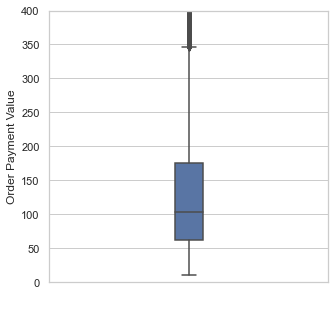

In [27]:
sns.set(style = 'whitegrid')
fig, axes = plt.subplots(figsize=(5,5))
sns.boxplot(data = price_stat['payment_value'], width = 0.1)
axes.set_ylim(0)
axes.set_ylabel('Order Payment Value')
axes.set_xlabel(' ')
axes.set_xticklabels(' ')
axes.set_ylim(0,400)
axes.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

In [28]:
price_stat.describe()

,payment_value
count,45101.000000
mean,160.744700
std,228.351475
min,10.070000
25%,61.770000
50%,103.550000
75%,175.860000
max,13664.080000


In [29]:
payment_count = pd.merge(olist_orders_dataset, olist_order_payments_dataset)
payment_count = payment_count[(payment_count['purchase_date'] >= datetime.date(2017,1,1)) & (payment_count['purchase_date'] < datetime.date(2018,1,1))]
payment_count = payment_count.groupby(['purchase_month', 'payment_type'])[['order_id']].count().reset_index()
payment_count = pd.pivot_table(payment_count, index = 'purchase_month', columns = 'payment_type', values = 'order_id', aggfunc = sum).fillna(0)

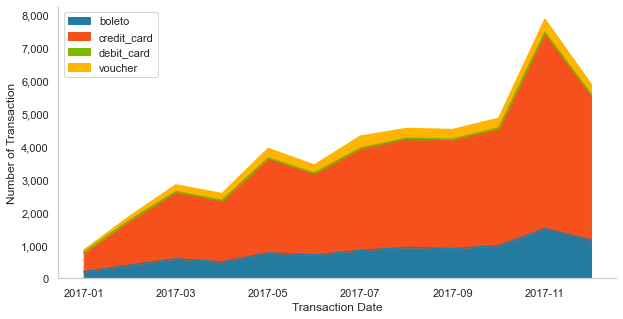

In [30]:
sns.set(style = 'whitegrid')
sns.set_palette(color)
axes = payment_count.plot.area(figsize=(10,5))
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_xlabel('Transaction Date')
axes.set_ylabel('Number of Transaction')
axes.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
axes.grid()
plt.legend()

In [31]:
payment_count.sum()

payment_type
boleto          9508
credit_card    34568
debit_card       422
voucher         3027
dtype: int64

In [32]:
payment_count.sum() / payment_count.sum().sum()

payment_type
boleto         0.200063
credit_card    0.727365
debit_card     0.008880
voucher        0.063693
dtype: float64

# Customer Satisfaction

The followings show customer review scores of each order. It is surprised that rating of 1 to 2 accounts for 14%, which implies that customer unsatisfaction exists.

In [33]:
review_stat = pd.merge(olist_orders_dataset, olist_order_reviews_dataset)
review_stat = review_stat[(review_stat['purchase_date'] >= datetime.date(2017,1,1)) & (review_stat['purchase_date'] < datetime.date(2018,1,1))]

In [34]:
review_stat['review_score'].value_counts()

5    25825
4     8889
1     5049
3     3815
2     1466
Name: review_score, dtype: int64

In [35]:
low_rate_comment = review_stat[(review_stat['review_score'] == 1) | (review_stat['review_score'] == 2)]
low_rate_comment = low_rate_comment[['review_comment_message']]
low_rate_comment = low_rate_comment.dropna()

In [36]:
low_rate_comment

,review_comment_message
6,fiquei triste por n ter me atendido.
10,Aguardando retorno da loja
19,os correios estäo em greve... näo recebi nenhu...
29,O produto veio faltando a base para auto e com...
40,"Inicialmente, na data da compra o produto era ..."
...,...
99162,"este produto que eu comprei, é uma propaganda ..."
99168,"Estou tentando ligar, mas não consigo. Meu pro..."
99171,Produto de baixa qualidade x preco x descrição...
99206,nao recebi o produto que ja paguei ! nao recom...


In [37]:
from wordcloud import WordCloud

In [38]:
wordcloud = WordCloud(background_color="white", height = 500, width = 500).generate(str(low_rate_comment['review_comment_message'].values))

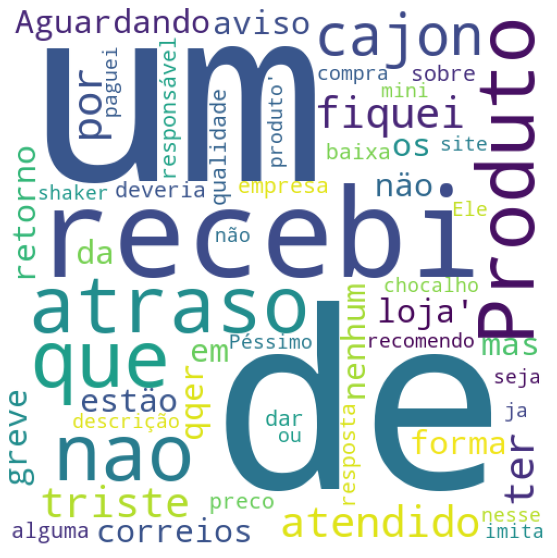

In [39]:
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

The above word cloud shows the keywords of orders which are rated from 1 to 2. “triste”, “atraso”, “aguardando”, “retorno”, “pessimo”, “qualidade”, these keywords imply that product quality and delayed delivery may be the reasons of low customer satification.

# Product Category

The followings show the top ten sales of product in 2017. With the average order value calculated before, we can know that stores on olist focus on daily lives products, but not luxury goods.

In [40]:
order_item = pd.merge(olist_order_items_dataset, olist_products_dataset[['product_id', 'product_category_name']])
order_item = pd.merge(order_item, product_category_name_translation)
order_item = pd.merge(order_item, olist_orders_dataset[['order_id', 'purchase_date']])
order_item = order_item[(order_item['purchase_date'] >= datetime.date(2017,1,1)) & (order_item['purchase_date'] < datetime.date(2018,1,1))]
order_item = order_item.groupby('product_category_name_english')[['order_id']].count().reset_index()

In [45]:
order_item.sort_values('order_id', ascending = False)[:10]

,product_category_name_english,order_id
7,bed_bath_table,5223
39,furniture_decor,4147
65,sports_leisure,4095
43,health_beauty,3668
15,computers_accessories,3098
49,housewares,2906
69,toys,2602
42,garden_tools,2463
20,cool_stuff,2315
70,watches_gifts,2283


# Customer Segmentation Model

To perform customer segmentation, we choose customers who had transactions in 2017 to be the input for the model. We first calculate sales information of each customer including number of order and transaction amount, and then we use k-means model to perform customer segmentation.

In [46]:
model_df = pd.merge(olist_orders_dataset, olist_customers_dataset)
model_df = pd.merge(model_df, price_stat)
model_count = model_df.groupby('customer_unique_id')[['order_id']].count().reset_index()
model_amount = model_df.groupby('customer_unique_id')[['payment_value']].sum().reset_index()
model_count['order_id'] = model_count['order_id'].astype(float)
model_df = pd.merge(model_count, model_amount)

In [47]:
from pycaret.clustering import *

clu = setup(model_df, normalize = True, ignore_features = ['customer_unique_id'], session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(43713, 3)"
2,Missing Values,False
3,Numeric Features,2
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(43713, 2)"
9,CPU Jobs,-1


In [48]:
kmeans = create_model('kmeans', num_clusters = 4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7566,48987.4124,0.5199,0,0,0


From the above table, we can see that Silhouette value is about 0.75, and the Silhouette values of all clusters are over 0.5, which means 4 clusters is reasonable.

Then, we use elbow method to evaluate the optimal number of clusters, the result shows that 4 is the optimal value, so we choose 4 as the number of clusters in the k-means model.

In [49]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [50]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

Finally, we look at the distance between each cluster, the plot above shows there are 4 clusters separated clearly. This is reasonable since customers purchased more than one time (Cluster 1) and high-end customers (Cluster 3) are well separated by the k-means model.

Overall, we can conclude that the k-means model with 4 clusters is acceptable since it gets good results in Silhouette, elbow methods and the distance plot.

In [70]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [52]:
result = assign_model(kmeans)

We use k-means model to perform 4 clusters segmentation, we can see that most customers are in Cluster 0.

In [53]:
result['Cluster'].value_counts()

Cluster 0    38045
Cluster 2     4007
Cluster 1     1243
Cluster 3      418
Name: Cluster, dtype: int64

In [54]:
order_item_model = pd.merge(olist_order_items_dataset, olist_products_dataset[['product_id', 'product_category_name']])
order_item_model = pd.merge(order_item_model, product_category_name_translation)
order_item_model = pd.merge(order_item_model, olist_orders_dataset[['order_id', 'purchase_date']])
order_item_model = order_item_model[(order_item_model['purchase_date'] >= datetime.date(2017,1,1)) & (order_item_model['purchase_date'] < datetime.date(2018,1,1))]

In [55]:
result.columns = ['customer_unique_id', 'count', 'payment_value', 'Cluster']

In [58]:
result.groupby('Cluster').count()

,customer_unique_id,count,payment_value
Cluster,,,
Cluster 0,38045,38045,38045
Cluster 1,1243,1243,1243
Cluster 2,4007,4007,4007
Cluster 3,418,418,418


To study customer characteristics of each cluster, we calculated the mean value of number of purchased order and total order value of each cluster. From the result, we can see that most customers (Cluster 0) only purchase one order in the whole year, and the average payment value is quite low, which is about R$109. Only 1% customers (Cluster 3) are high value customers, the average payment value is very high, which is about R 1,786.

In [59]:
result.groupby('Cluster').mean()

,count,payment_value
Cluster,,
Cluster 0,1.000000,109.220769
Cluster 1,2.106195,283.438817
Cluster 2,1.000000,498.017829
Cluster 3,1.031100,1786.054234


In [60]:
result_order_item = pd.merge(pd.merge(pd.merge(olist_orders_dataset, olist_customers_dataset)[['order_id', 'customer_unique_id']], result, on = 'customer_unique_id'), order_item_model)

In [66]:
result_order_item[result_order_item['Cluster'] == 'Cluster 0']['product_category_name_english'].value_counts().head(5)

bed_bath_table     4364
sports_leisure     3471
furniture_decor    3342
health_beauty      2920
housewares         2556
Name: product_category_name_english, dtype: int64

In [67]:
result_order_item[result_order_item['Cluster'] == 'Cluster 1']['product_category_name_english'].value_counts().head(5)

bed_bath_table           548
furniture_decor          403
sports_leisure           323
health_beauty            250
computers_accessories    159
Name: product_category_name_english, dtype: int64

In [68]:
result_order_item[result_order_item['Cluster'] == 'Cluster 2']['product_category_name_english'].value_counts().head(5)

computers_accessories    479
health_beauty            458
watches_gifts            402
furniture_decor          356
garden_tools             344
Name: product_category_name_english, dtype: int64

In [69]:
result_order_item[result_order_item['Cluster'] == 'Cluster 3']['product_category_name_english'].value_counts().head(5)

computers                100
computers_accessories     70
auto                      67
watches_gifts             51
furniture_decor           46
Name: product_category_name_english, dtype: int64

From the above tables, we can see that low-end customers mainly purchased housing and daily lives products, and the high-end customers mainly purchased computers and computers accessories.

# Conclusion

By studying the Olist data, we have the following findings.
The Olist platform is established in 2015, transaction is still not active in 2017, most customers only make one order in the whole year, and most transaction values are quite low. Thus, it is necessary to boost transaction volume.
To increase sales, we can focus two groups of customers. The first group is the common customers who purchase housing and daily lives products. It may be an opportunity to offer one click for periodic orders for these customers, and this can increase sales and sustainable cashflow. The second group is the high-end customers who purchase computers and computer accessories, product mix like buying computer with monitor can be offered to these customers to increase sales.
Black Friday is also crucial to the platform, we can see that there is a huge increase in sales on Black Friday, Olist should take the chance to boost transaction volume. Cooperating with bank to introduce credit card promotion during Black Friday can be considered, since most of the customers paid with credit cards.
Product quality and delivery are also crucial since we can see that product quality and delayed delivery are mentioned in the customer review, and this also affects customer retention.
By studying the Olist data, we have an example of customer behavior in E-Commerce field. Hopefully, we can use the findings above to apply in other companies E-Commerce field.